# Data Capstone Project

## Problem definition:
In this project, I will use a traffic dataset to build a map showing the traffic condition in New York City at different hours during the day. The main purpose of the project is to give users an insight as to which hours during the day are peak hours, and which area has the most traffic during these peak hours. This can help users navigate around the city avoiding high traffic areas during peak hours. The goal is to help reduce the traffic in a specific area and help reduce the travel time during peak hours.


## Library imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [2]:
df = pd.read_csv('Traffic_Volume_Counts__2014-2018_.csv')

In [3]:
df.head()

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,2,70376,3 Avenue,East 154 Street,East 155 Street,NB,09/13/2014,204.0,177.0,133.0,...,520,611,573,546,582,528,432,328,282,240
1,2,70376,3 Avenue,East 155 Street,East 154 Street,SB,09/13/2014,140.0,51.0,128.0,...,379,376,329,362,418,335,282,247,237,191
2,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,EB,09/13/2014,94.0,73.0,65.0,...,280,272,264,236,213,190,199,183,147,103
3,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,WB,09/13/2014,88.0,82.0,75.0,...,237,276,223,240,217,198,186,162,157,103
4,62,147673,Broadway,West 242 Street,240 Street,SB,09/13/2014,255.0,209.0,149.0,...,732,809,707,675,641,556,546,465,425,324


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21448 entries, 0 to 21447
Data columns (total 31 columns):
ID               21448 non-null int64
Segment ID       21448 non-null int64
Roadway Name     21448 non-null object
From             21448 non-null object
To               21448 non-null object
Direction        21448 non-null object
Date             21448 non-null object
12:00-1:00 AM    21444 non-null float64
1:00-2:00AM      21444 non-null float64
2:00-3:00AM      21444 non-null float64
3:00-4:00AM      21444 non-null float64
4:00-5:00AM      21444 non-null float64
5:00-6:00AM      21444 non-null float64
6:00-7:00AM      21444 non-null float64
7:00-8:00AM      21444 non-null float64
8:00-9:00AM      21444 non-null float64
9:00-10:00AM     21444 non-null float64
10:00-11:00AM    21445 non-null float64
11:00-12:00PM    21447 non-null float64
12:00-1:00PM     21448 non-null int64
1:00-2:00PM      21448 non-null int64
2:00-3:00PM      21448 non-null int64
3:00-4:00PM      21448 non

## Data Cleaning

In [5]:
df['Roadway Name'] = df['Roadway Name'].apply(lambda x:x.lower())
df1 = df.groupby(['Roadway Name']).apply(sum)

In [6]:
df1.head()

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
Roadway Name,,,,,,,,,,,,,,,,,,,,,
1 avenue,12159,83229831,1 avenue1 avenue1 avenue1 avenue1 avenue1 aven...,EAST 11 STREETEAST 12 STREETEAST 11 STREETEAST...,EAST 12 STREETEAST 13 STREETEAST 12 STREETEAST...,NBNBNBNBNBNBNBNBNBNBNBNBNBNBNBNBNBNBNBNBNBNBNB...,10/03/201510/03/201510/04/201510/04/201510/05/...,70126.0,56494.0,44323.0,...,88686,92420,92982,95725,98349,94528,88621,84679,79551,74570
10 avenue,2547,2886345,10 avenue10 avenue10 avenue10 avenue10 avenue1...,67 STREET67 STREET67 STREET67 STREET67 STREET6...,68 STREET68 STREET68 STREET68 STREET68 STREET6...,NBSBNBSBNBSBNBSBNBSBNBSBNBSBNBSBNBSBNBNBNBNBNB...,10/15/201610/15/201610/16/201610/16/201610/17/...,41433.0,32516.0,25005.0,...,55076,56210,55716,57009,56948,56039,54252,51715,49142,43694
101 avenue,7344,1965474,101 avenue101 avenue101 avenue101 avenue101 av...,107 STREET107 STREETCRESSKILL PLACECRESSKILL P...,108 STREET108 STREETBRISBIN STREETBRISBIN STRE...,EBWBEBWBEBWBEBWBEBWBEBWBEBWBEBWBEBWBEBWBEBWBEB...,11/14/201511/14/201511/14/201511/14/201511/15/...,1760.0,1253.0,884.0,...,9154,9275,10151,10195,8636,6988,5347,3919,3150,2372
103 street,1539,3194172,103 street103 street103 street103 street103 st...,Northern BoulevardNorthern BoulevardNorthern B...,34 Avenue34 Avenue34 Avenue34 Avenue34 Avenue3...,NBNBNBNBNBNBNBNBNBNBNBNBNBNBNBNBNBNB,10/11/201410/12/201410/13/201410/14/201410/15/...,1300.0,997.0,863.0,...,3273,3376,3254,3702,3674,3623,3238,2760,2146,1602
108 street,10314,10835334,108 street108 street108 street108 street108 st...,62 Avenue62 Avenue62 Drive62 DriveNorthern Bou...,Apex PlaceApex Place63 Avenue63 Avenue34 Avenu...,NBSBNBSBNBSBNBSBNBSBNBSBNBSBNBSBNBSBNBSBNBSBNB...,10/11/201410/11/201410/11/201410/11/201410/11/...,11877.0,7796.0,5490.0,...,36177,37044,37847,39136,37979,36564,30972,25136,21237,15849


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597 entries, 1 avenue to zerega avenue
Data columns (total 31 columns):
ID               597 non-null int64
Segment ID       597 non-null int64
Roadway Name     597 non-null object
From             597 non-null object
To               597 non-null object
Direction        597 non-null object
Date             597 non-null object
12:00-1:00 AM    597 non-null float64
1:00-2:00AM      597 non-null float64
2:00-3:00AM      597 non-null float64
3:00-4:00AM      597 non-null float64
4:00-5:00AM      597 non-null float64
5:00-6:00AM      597 non-null float64
6:00-7:00AM      597 non-null float64
7:00-8:00AM      597 non-null float64
8:00-9:00AM      597 non-null float64
9:00-10:00AM     597 non-null float64
10:00-11:00AM    597 non-null float64
11:00-12:00PM    597 non-null float64
12:00-1:00PM     597 non-null int64
1:00-2:00PM      597 non-null int64
2:00-3:00PM      597 non-null int64
3:00-4:00PM      597 non-null int64
4:00-5:00PM      597 non-n

In [8]:
df1.drop(['Roadway Name','From','To','Direction','Date','Segment ID','ID','Date'],axis=1,inplace=True)

In [9]:
df1.head()

,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
Roadway Name,,,,,,,,,,,,,,,,,,,,,
1 avenue,70126.0,56494.0,44323.0,35547.0,33202.0,38261.0,57076.0,79298.0,83167.0,80788.0,...,88686,92420,92982,95725,98349,94528,88621,84679,79551,74570
10 avenue,41433.0,32516.0,25005.0,21481.0,19450.0,21826.0,29436.0,37065.0,41376.0,44914.0,...,55076,56210,55716,57009,56948,56039,54252,51715,49142,43694
101 avenue,1760.0,1253.0,884.0,803.0,1019.0,1733.0,3944.0,7980.0,7354.0,6409.0,...,9154,9275,10151,10195,8636,6988,5347,3919,3150,2372
103 street,1300.0,997.0,863.0,722.0,980.0,1008.0,1531.0,2363.0,2357.0,2516.0,...,3273,3376,3254,3702,3674,3623,3238,2760,2146,1602
108 street,11877.0,7796.0,5490.0,4370.0,5009.0,7079.0,14118.0,24250.0,28503.0,29149.0,...,36177,37044,37847,39136,37979,36564,30972,25136,21237,15849


In [10]:
df1.columns

Index(['12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM',
       '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM',
       '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM',
       '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM',
       '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM',
       '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM'],
      dtype='object')

## Data Visualization

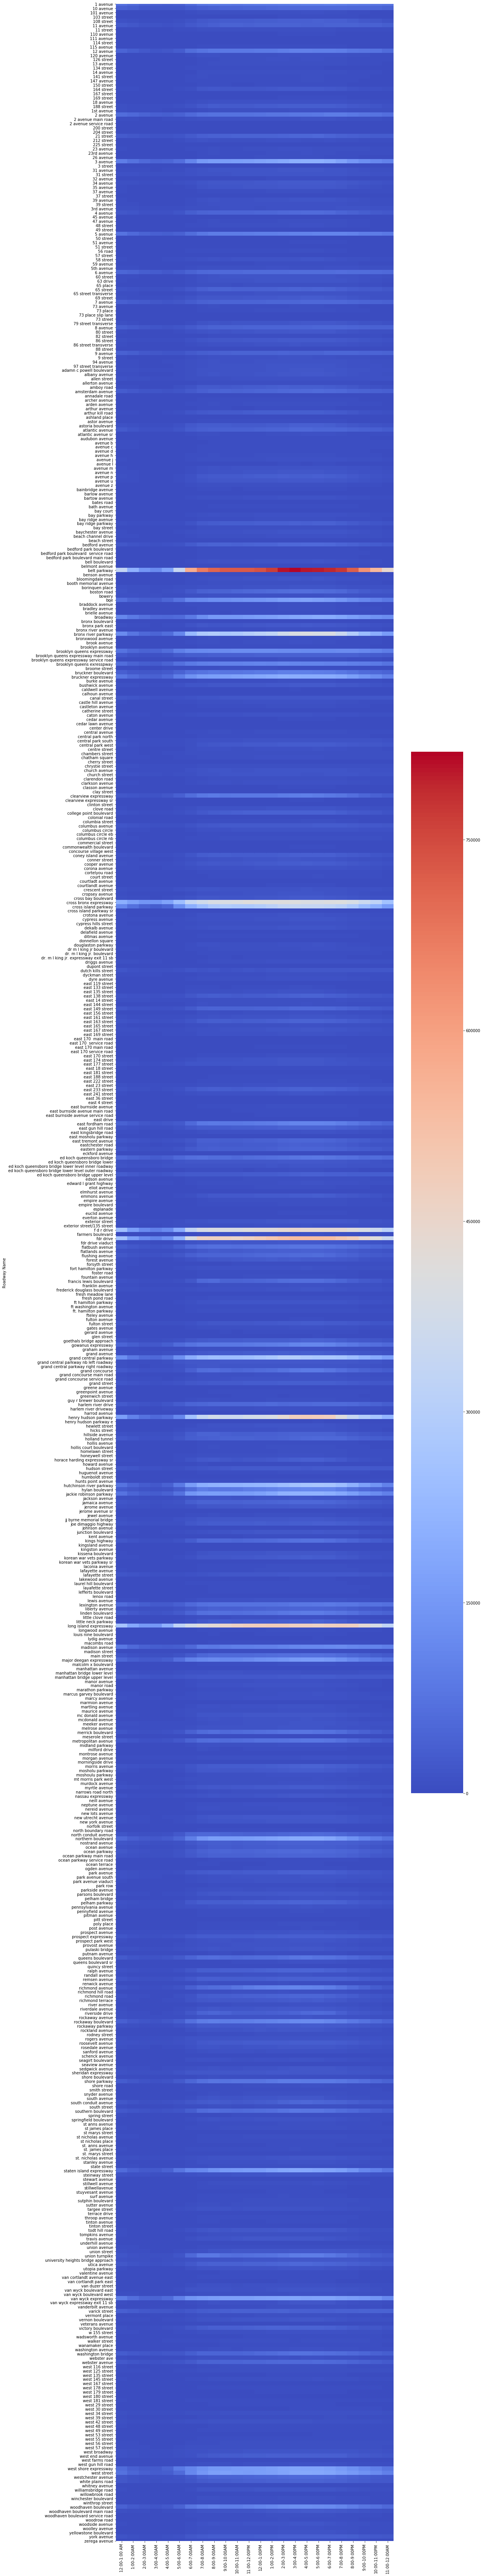

In [11]:
plt.figure(figsize=(16,120))
sns.heatmap(data=df1,cmap='coolwarm')

## More Data Cleaning

In [12]:
time = ['7:00-8:00AM', '8:00-9:00AM', '9:00-10:00AM', '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM']

In [13]:
df2 = df1

In [14]:
for i in range(len(time)):
    df2 = df2[df2[time[i]]>40000]

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 1 avenue to woodhaven boulevard
Data columns (total 24 columns):
12:00-1:00 AM    61 non-null float64
1:00-2:00AM      61 non-null float64
2:00-3:00AM      61 non-null float64
3:00-4:00AM      61 non-null float64
4:00-5:00AM      61 non-null float64
5:00-6:00AM      61 non-null float64
6:00-7:00AM      61 non-null float64
7:00-8:00AM      61 non-null float64
8:00-9:00AM      61 non-null float64
9:00-10:00AM     61 non-null float64
10:00-11:00AM    61 non-null float64
11:00-12:00PM    61 non-null float64
12:00-1:00PM     61 non-null int64
1:00-2:00PM      61 non-null int64
2:00-3:00PM      61 non-null int64
3:00-4:00PM      61 non-null int64
4:00-5:00PM      61 non-null int64
5:00-6:00PM      61 non-null int64
6:00-7:00PM      61 non-null int64
7:00-8:00PM      61 non-null int64
8:00-9:00PM      61 non-null int64
9:00-10:00PM     61 non-null int64
10:00-11:00PM    61 non-null int64
11:00-12:00AM    61 non-null int64
dtypes: float6

In [16]:
df2.head()

,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
Roadway Name,,,,,,,,,,,,,,,,,,,,,
1 avenue,70126.0,56494.0,44323.0,35547.0,33202.0,38261.0,57076.0,79298.0,83167.0,80788.0,...,88686,92420,92982,95725,98349,94528,88621,84679,79551,74570
12 avenue,45459.0,32785.0,23787.0,19192.0,19804.0,31228.0,61769.0,76233.0,82330.0,83824.0,...,94416,100856,99622,98329,97228,93731,83121,77996,75677,60696
2 avenue,60946.0,51959.0,43171.0,36892.0,33776.0,38989.0,55156.0,67678.0,73185.0,73492.0,...,79674,80481,80775,85885,90651,91061,84903,79468,74161,67123
3 avenue,94934.0,71819.0,56392.0,47977.0,48962.0,65609.0,111600.0,151200.0,162190.0,161092.0,...,190052,201841,206218,207166,196353,175721,150093,129854,116003,105453
4 avenue,20995.0,16259.0,12435.0,10557.0,11696.0,18543.0,34205.0,42618.0,44810.0,46451.0,...,52695,56596,58546,59301,55008,47073,38772,32594,27875,23824


## Data Visualization

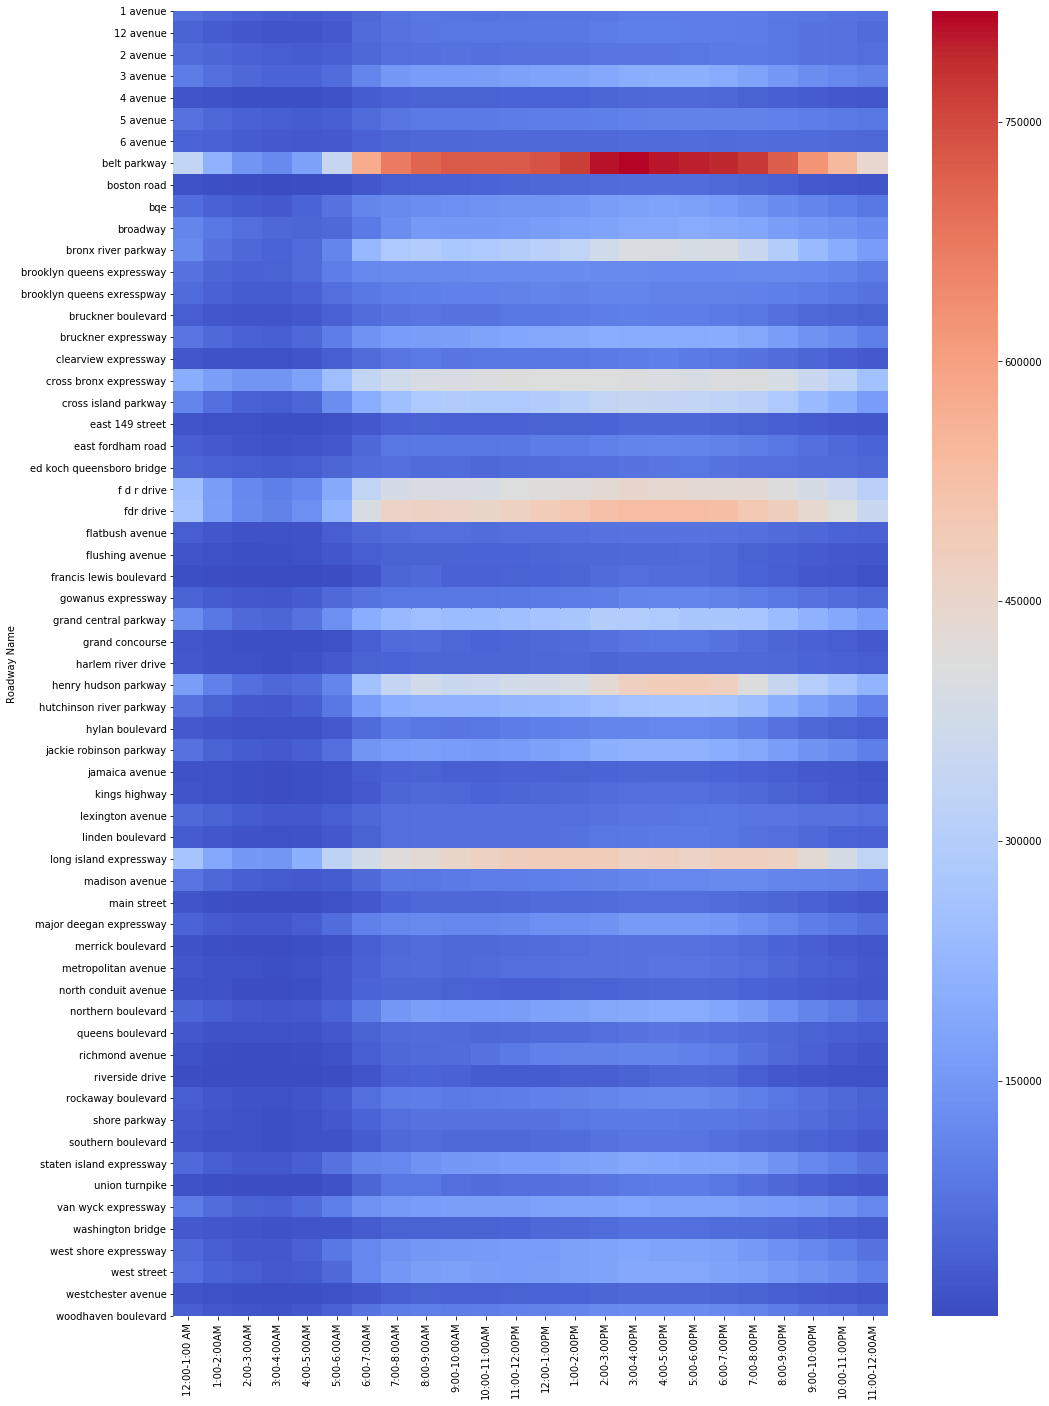

In [17]:
plt.figure(figsize=(16,24))
sns.heatmap(df2,cmap='coolwarm')